<a href="https://colab.research.google.com/github/karriechou/hacktheglobe_2023/blob/main/team17_fake_jobs_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jobs = pd.read_csv("fake_job_postings.csv")
jobs.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
jobs.dtypes.to_frame()

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [ ]:
colnames = jobs.columns.tolist()
jobs[colnames].isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
# drop columns with large amounts of NA
jobs = jobs.drop(["job_id", "department", "salary_range"], axis = 1)

In [ ]:
text_vars = ["title", "location", "company_profile", "description", "requirements", "benefits"]
cat_vars = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function", "fraudulent"]

text = jobs[text_vars].fillna(" ")
cat = jobs[cat_vars].fillna("None")

jobs = pd.concat([text, cat], axis = 1)

# EDA

Concept: look at differences between fraudulent and not fraudulent jobs. 

In [ ]:
jobs.head(5)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,None,None,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,None,None,None,None,None,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


([<matplotlib.patches.Wedge at 0x7f12c48cce20>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Jobs'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Jobs')],
 [Text(-0.593067594899332, 0.09094409205837257, '95.2%'),
  Text(0.5930675906419312, -0.09094411982187034, '4.8%')])

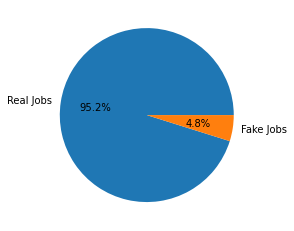

In [ ]:
fraudulent_vs_nonfraudulent_jobs = jobs["fraudulent"].value_counts().values
plt.pie(fraudulent_vs_nonfraudulent_jobs, labels = ["Real Jobs", "Fake Jobs"], autopct = "%.1f%%")

In [ ]:
fraudulent_jobs = jobs[(jobs["fraudulent"] == 1)]
not_fraudulent_jobs = jobs[(jobs["fraudulent"] == 0)]

In [ ]:
fraudulent_jobs.head(5)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,,,The group has raised a fund for the purchase o...,,,0,0,0,None,None,None,None,None,1
173,Technician Instrument & Controls,US,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,Sales Executive,"PK, SD, Karachi",,Sales Executive,Sales Executive,Sales Executive,0,0,0,None,None,None,None,Sales,1
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


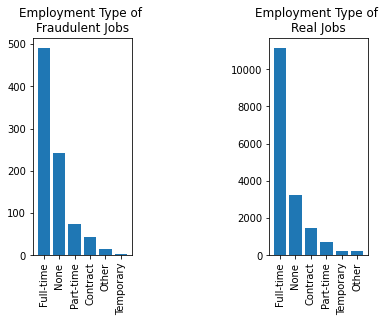

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["employment_type"].value_counts().index.tolist(), height = fraudulent_jobs["employment_type"].value_counts())
plt.xticks(rotation = 90)
plt.title("Employment Type of \nFraudulent Jobs")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["employment_type"].value_counts().index.tolist(), height = not_fraudulent_jobs["employment_type"].value_counts())
plt.xticks(rotation = 90)
plt.title("Employment Type of \nReal Jobs")

plt.show()

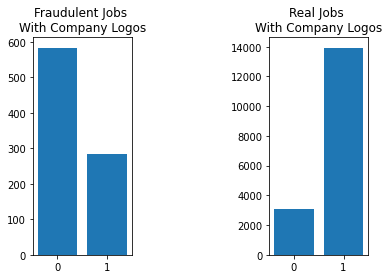

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["has_company_logo"].value_counts().index.tolist(), height = fraudulent_jobs["has_company_logo"].value_counts())
plt.xticks(np.arange(min(fraudulent_jobs["has_company_logo"].value_counts().index.tolist()), max(fraudulent_jobs["has_company_logo"].value_counts().index.tolist())+1, 1.0))
plt.title("Fraudulent Jobs \nWith Company Logos")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["has_company_logo"].value_counts().index.tolist(), height = not_fraudulent_jobs["has_company_logo"].value_counts())
plt.xticks(np.arange(min(not_fraudulent_jobs["has_company_logo"].value_counts().index.tolist()), max(not_fraudulent_jobs["has_company_logo"].value_counts().index.tolist())+1, 1.0))
plt.title("Real Jobs \nWith Company Logos")

plt.show()

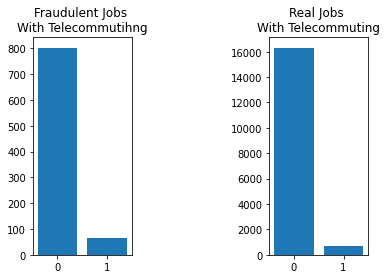

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["telecommuting"].value_counts().index.tolist(), height = fraudulent_jobs["telecommuting"].value_counts())
plt.xticks(np.arange(min(fraudulent_jobs["telecommuting"].value_counts().index.tolist()), max(fraudulent_jobs["telecommuting"].value_counts().index.tolist())+1, 1.0))
plt.title("Fraudulent Jobs \nWith Telecommutihng")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["telecommuting"].value_counts().index.tolist(), height = not_fraudulent_jobs["telecommuting"].value_counts())
plt.xticks(np.arange(min(not_fraudulent_jobs["telecommuting"].value_counts().index.tolist()), max(not_fraudulent_jobs["telecommuting"].value_counts().index.tolist())+1, 1.0))
plt.title("Real Jobs \nWith Telecommuting")

plt.show()

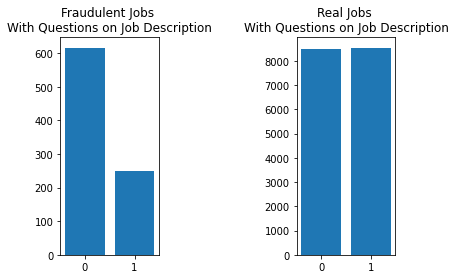

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["has_questions"].value_counts().index.tolist(), height = fraudulent_jobs["has_questions"].value_counts())
plt.xticks(np.arange(min(fraudulent_jobs["has_questions"].value_counts().index.tolist()), max(fraudulent_jobs["has_questions"].value_counts().index.tolist())+1, 1.0))
plt.title("Fraudulent Jobs \nWith Questions on Job Description")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["has_questions"].value_counts().index.tolist(), height = not_fraudulent_jobs["has_questions"].value_counts())
plt.xticks(np.arange(min(not_fraudulent_jobs["has_questions"].value_counts().index.tolist()), max(not_fraudulent_jobs["has_questions"].value_counts().index.tolist())+1, 1.0))
plt.title("Real Jobs \nWith Questions on Job Description")

plt.show()

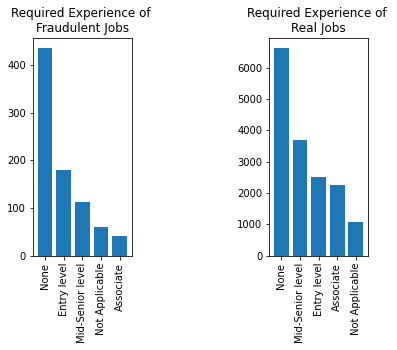

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["required_experience"].value_counts()[:5].index.tolist(), height = fraudulent_jobs["required_experience"].value_counts()[:5])
plt.xticks(rotation = 90)
plt.title("Required Experience of \nFraudulent Jobs")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["required_experience"].value_counts()[:5].index.tolist(), height = not_fraudulent_jobs["required_experience"].value_counts()[:5])
plt.xticks(rotation = 90)
plt.title("Required Experience of \nReal Jobs")

plt.show()

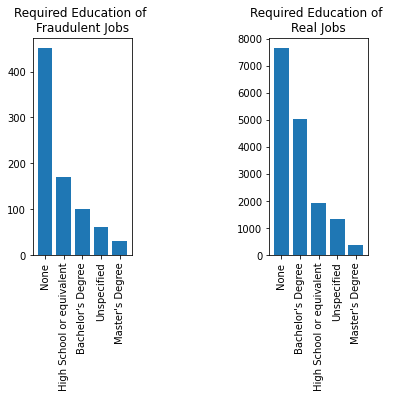

In [ ]:
plt.subplot(1, 3, 1)
plt.bar(x = fraudulent_jobs["required_education"].value_counts()[:5].index.tolist(), height = fraudulent_jobs["required_education"].value_counts()[:5])
plt.xticks(rotation = 90)
plt.title("Required Education of \nFraudulent Jobs")

plt.subplot(1, 3, 3)
fig2 = plt.bar(x = not_fraudulent_jobs["required_education"].value_counts()[:5].index.tolist(), height = not_fraudulent_jobs["required_education"].value_counts()[:5])
plt.xticks(rotation = 90)
plt.title("Required Education of \nReal Jobs")

plt.show()

# Model building and evaluation

Only using categorical features. 

In [ ]:
features = jobs[cat_vars].drop("fraudulent", axis = 1)
target = jobs["fraudulent"]

In [ ]:
features.head(5)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,0,1,0,Other,Internship,None,None,Marketing
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service
2,0,1,0,None,None,None,None,None
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [ ]:
employment_type_num_replacer = {}
num = 0
for i in features["employment_type"].value_counts().index.tolist(): 
  employment_type_num_replacer[i] = num
  num += 1

features["employment_type"] = features["employment_type"].replace(features["employment_type"].value_counts().index.tolist(), employment_type_num_replacer.values())

In [ ]:
required_experience_num_replacer = {}
num = 0
for i in features["required_experience"].value_counts().index.tolist(): 
  required_experience_num_replacer[i] = num
  num += 1

features["required_experience"] = features["required_experience"].replace(features["required_experience"].value_counts().index.tolist(), required_experience_num_replacer.values())

In [ ]:
required_education_num_replacer = {}
num = 0
for i in features["required_education"].value_counts().index.tolist(): 
  required_education_num_replacer[i] = num
  num += 1

features["required_education"] = features["required_education"].replace(features["required_education"].value_counts().index.tolist(), required_education_num_replacer.values())

In [ ]:
industry_num_replacer = {}
num = 0
for i in features["industry"].value_counts().index.tolist(): 
  industry_num_replacer[i] = num
  num += 1

features["industry"] = features["industry"].replace(features["industry"].value_counts().index.tolist(), industry_num_replacer.values())

In [ ]:
function_num_replacer = {}
num = 0
for i in features["function"].value_counts().index.tolist(): 
  function_num_replacer[i] = num
  num += 1

features["function"] = features["function"].replace(features["function"].value_counts().index.tolist(), function_num_replacer.values())

In [236]:
# Splitting data into training and test sets
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.naive_bayes import MultinomialNB

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [237]:
# Building the model
NB_classifier = MultinomialNB()
model = NB_classifier.fit(features_train, target_train)
scores = cross_val_score(model, features_train, target_train, cv=10)
scores

array([0.90286513, 0.88749126, 0.90356394, 0.90496157, 0.93006993,
       0.92797203, 0.8972028 , 0.88391608, 0.88811189, 0.91398601])

In [238]:
target_predict = NB_classifier.predict(features_test)

In [240]:
# Evaluating the model – accuracy and f1 score
from sklearn.metrics import (accuracy_score, f1_score)

accuracy = accuracy_score(target_predict, target_test)
print("Accuracy: " + str(accuracy))

f1 = f1_score(target_predict, target_test, average = "weighted")
print("Weighted f1 Score: " + str(f1))

Accuracy: 0.9046420581655481
Weighted f1 Score: 0.906025766483875


In [241]:
# Evaluating the model – confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_predict, target_test))

[[3226  176]
 [ 165    9]]


In [242]:
# Evaulating the model – precision and recall
from sklearn.metrics import classification_report

print(classification_report(target_predict, target_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3402
           1       0.05      0.05      0.05       174

    accuracy                           0.90      3576
   macro avg       0.50      0.50      0.50      3576
weighted avg       0.91      0.90      0.91      3576

